In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

import re
from collections import defaultdict
from pprint import pprint
from joblib import Parallel, delayed
import time
import copy

WAV_FILE_PATH = '../../data/input/waveforms_t0notcal.root'
DATASET_PATH = '../../data/converted_input/dataset_t0notcal.pkl'

import uproot
import pickle

import numpy as np
from matplotlib import pyplot as plt

from src.cfd import CFD

# Load data

In [2]:
N_JOBS = 8

In [3]:
SECTOR = 'sector 56'
STATION = 'station 220cyl'
RP = 'cyl_hr'

data_dir = f'wav/CTPPS/TimingDiamond/{SECTOR}/{STATION}/{RP}'

In [4]:
file_raw = uproot.open(WAV_FILE_PATH)

len(file_raw[data_dir].keys(recursive=False))

30191

In [5]:
sorted_events = sorted(file_raw[data_dir].keys(recursive=False), key=lambda x: int(x[6:-2]))
sorted_events[:10]

['event 3375;1',
 'event 6341;1',
 'event 7535;1',
 'event 8570;1',
 'event 9831;1',
 'event 9900;1',
 'event 10650;1',
 'event 11542;1',
 'event 13050;1',
 'event 14400;1']

In [6]:
# load the dataset
with open(DATASET_PATH, 'rb') as file:
    t0_cal, t0_notcal = pickle.load(file)

In [7]:
file_raw.close()

# t0 Histograms

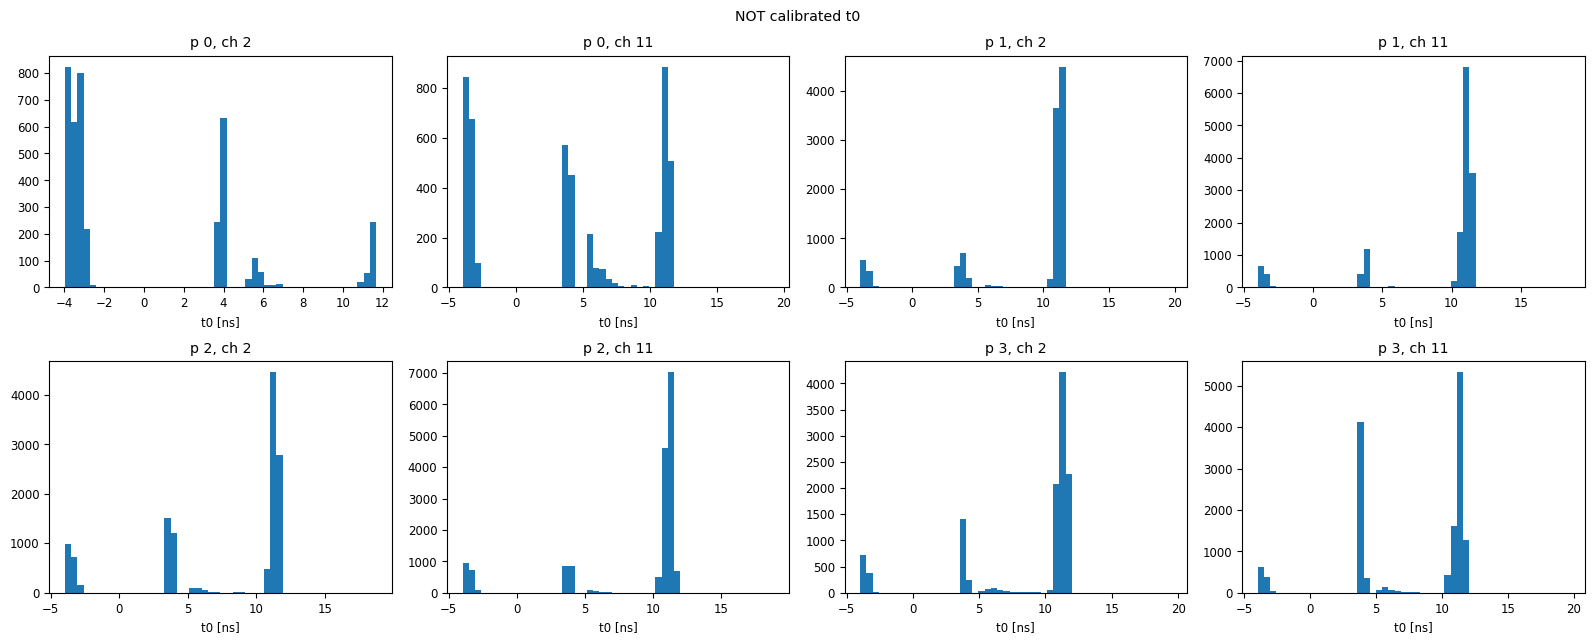

In [8]:
plt.figure(figsize=(16, 6.5))
plt.rc('font', size=8.5)

for i, (plane, channel) in enumerate(sorted(t0_notcal.keys())):
    t0_arr = t0_notcal[(plane, channel)]
    plt.subplot(2, 4, i + 1)
    plt.hist(t0_arr, bins=50)
    plt.title(f'p {plane}, ch {channel}')
    plt.xlabel('t0 [ns]')
    
plt.suptitle('NOT calibrated t0')
plt.tight_layout()
plt.show()

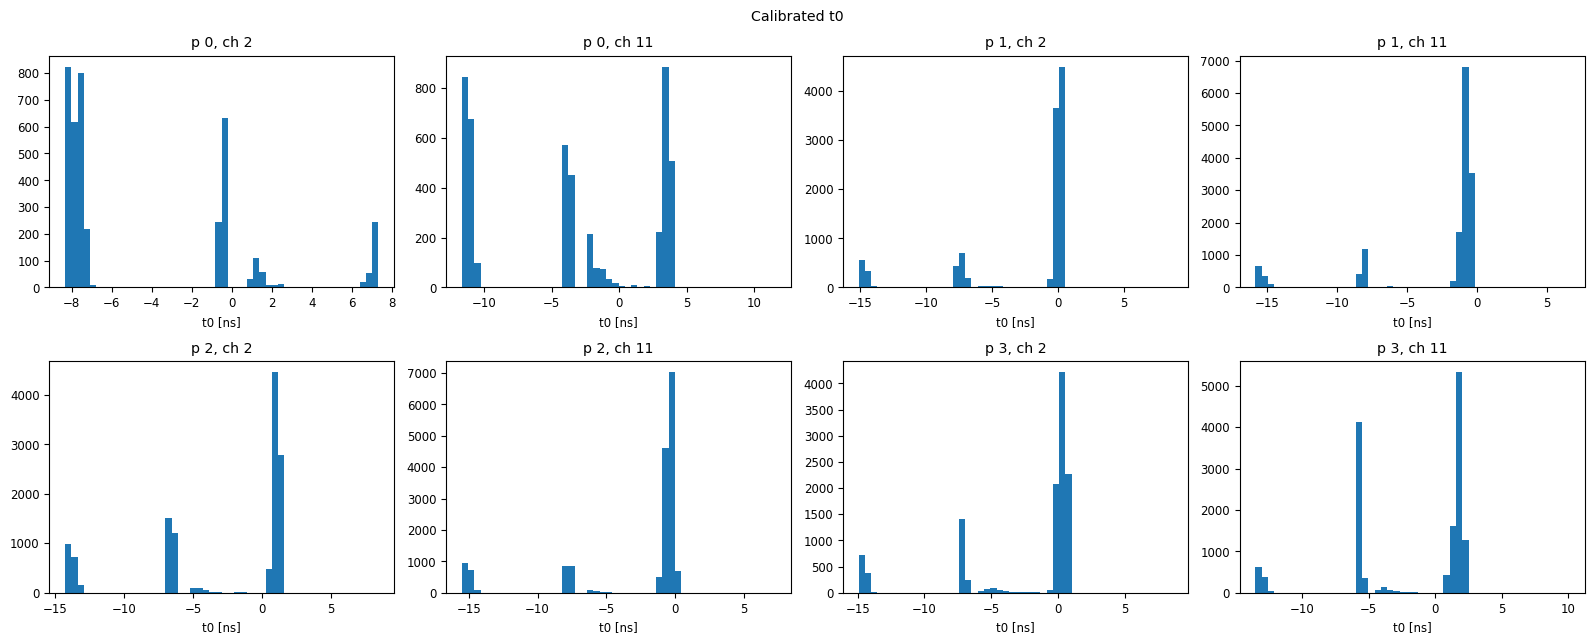

In [9]:
plt.figure(figsize=(16, 6.5))
plt.rc('font', size=8.5)

for i, (plane, channel) in enumerate(sorted(t0_cal.keys())):
    t0_arr = t0_cal[(plane, channel)]
    plt.subplot(2, 4, i + 1)
    plt.hist(t0_arr, bins=50)
    plt.title(f'p {plane}, ch {channel}')
    plt.xlabel('t0 [ns]')
    
plt.suptitle('Calibrated t0')
plt.tight_layout()
plt.show()